# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then append
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse info

record_counter = 0
set_counter = 0
city_data = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    response = requests.get(query_url + city).json()
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        city_data.append(city)
    except:
        print("Couldn't find city")
        pass
        
        
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

Beginning Data Retrieval
------------------------
Processing record 0 of set 0 | namibe
Processing record 1 of set 0 | chuy
Processing record 2 of set 0 | avarua
Processing record 3 of set 0 | darhan
Processing record 4 of set 0 | albany
Processing record 5 of set 0 | aklavik
Processing record 6 of set 0 | punta arenas
Processing record 7 of set 0 | dikson
Processing record 8 of set 0 | vaini
Processing record 9 of set 0 | ushuaia
Processing record 10 of set 0 | lebu
Processing record 11 of set 0 | robe
Processing record 12 of set 0 | katsuura
Processing record 13 of set 0 | byron bay
Processing record 14 of set 0 | lalomanu
Couldn't find city
Processing record 15 of set 0 | rocha
Processing record 16 of set 0 | talnakh
Processing record 17 of set 0 | nalut
Processing record 18 of set 0 | necochea
Processing record 19 of set 0 | sioux lookout
Processing record 20 of set 0 | khatanga
Processing record 21 of set 0 | andenes
Processing record 22 of set 0 | poum
Processing record 23 of set

Processing record 36 of set 3 | novikovo
Processing record 37 of set 3 | santa maria
Processing record 38 of set 3 | tilichiki
Processing record 39 of set 3 | sur
Processing record 40 of set 3 | yellowknife
Processing record 41 of set 3 | seoul
Processing record 42 of set 3 | portage
Processing record 43 of set 3 | farafangana
Processing record 44 of set 3 | solnechnyy
Processing record 45 of set 3 | georgetown
Processing record 46 of set 3 | samusu
Couldn't find city
Processing record 47 of set 3 | oranjemund
Processing record 48 of set 3 | pyaozerskiy
Processing record 49 of set 3 | samalaeulu
Couldn't find city
Processing record 50 of set 3 | buarcos
Processing record 0 of set 4 | hilo
Processing record 1 of set 4 | paamiut
Processing record 2 of set 4 | sibolga
Processing record 3 of set 4 | caraquet
Processing record 4 of set 4 | wenling
Processing record 5 of set 4 | fukue
Processing record 6 of set 4 | grand river south east
Couldn't find city
Processing record 7 of set 4 | bura

Processing record 22 of set 7 | quatre cocos
Processing record 23 of set 7 | maniitsoq
Processing record 24 of set 7 | lorengau
Processing record 25 of set 7 | saint anthony
Processing record 26 of set 7 | ormond beach
Processing record 27 of set 7 | tulun
Processing record 28 of set 7 | kununurra
Processing record 29 of set 7 | lavrentiya
Processing record 30 of set 7 | la ciotat
Processing record 31 of set 7 | bandarbeyla
Processing record 32 of set 7 | aloleng
Processing record 33 of set 7 | brownwood
Processing record 34 of set 7 | asau
Processing record 35 of set 7 | luau
Processing record 36 of set 7 | grand centre
Couldn't find city
Processing record 37 of set 7 | esperance
Processing record 38 of set 7 | thai nguyen
Processing record 39 of set 7 | fengkou
Processing record 40 of set 7 | otradnoye
Processing record 41 of set 7 | warri
Processing record 42 of set 7 | makat
Processing record 43 of set 7 | canaries
Processing record 44 of set 7 | bela
Processing record 45 of set 7 

Processing record 8 of set 11 | esna
Processing record 9 of set 11 | ileza
Processing record 10 of set 11 | cayenne
Processing record 11 of set 11 | chipinge
Processing record 12 of set 11 | khuzhir
Processing record 13 of set 11 | lamu
Processing record 14 of set 11 | kukmor
Processing record 15 of set 11 | samarai
Processing record 16 of set 11 | phek
Processing record 17 of set 11 | okhotsk
Processing record 18 of set 11 | khonuu
Couldn't find city
Processing record 19 of set 11 | niamey
Processing record 20 of set 11 | mangrol
Processing record 21 of set 11 | gorontalo
Processing record 22 of set 11 | liverpool
Processing record 23 of set 11 | batagay-alyta
Processing record 24 of set 11 | revda
Processing record 25 of set 11 | guerrero negro
Processing record 26 of set 11 | lewiston
Processing record 27 of set 11 | manokwari
Processing record 28 of set 11 | kargasok
Processing record 29 of set 11 | xingyi
Processing record 30 of set 11 | borgarnes
Processing record 31 of set 11 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [64]:
data_dict = {
    "City": city_data,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind_Speed" : wind
}
weather_data = pd.DataFrame(data_dict)
weather_data.count()
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind_Speed
0,namibe,0,AO,1621115518,57,23.77,-15.1961,12.1522,1.08
1,chuy,100,UY,1621115518,72,12.41,-33.6971,-53.4616,1.60
2,avarua,40,CK,1621115310,74,27.00,-21.2078,-159.7750,5.66
3,darhan,10,MN,1621115519,49,8.63,49.4867,105.9228,1.64
4,albany,1,US,1621115474,23,23.00,42.6001,-73.9662,4.12


In [65]:
weather_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
weather_data["Humidity"].describe(include = "all")

count    563.000000
mean      69.849023
std       23.458382
min        1.000000
25%       57.000000
50%       76.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

In [67]:
#  Get the indices of cities that have humidity over 100%.


In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

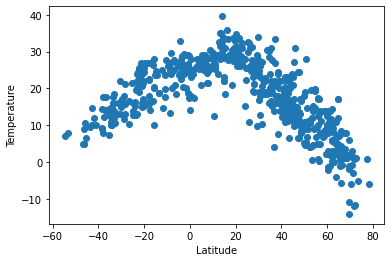

In [127]:
plt.scatter(weather_data.Lat,weather_data.Temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("Images/LatvsTemp.png", dpi=100)
plt.show()



## Latitude vs. Humidity Plot

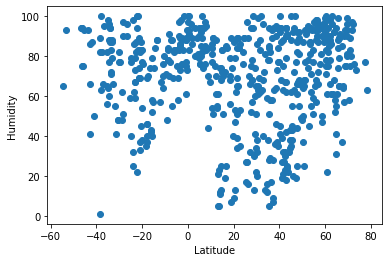

In [128]:
plt.scatter(weather_data.Lat,weather_data.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/LatvsHumidity.png", dpi=100)
plt.show()

## Latitude vs. Cloudiness Plot

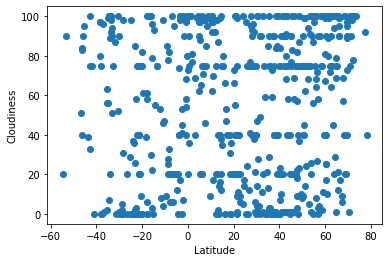

In [129]:
plt.scatter(weather_data.Lat,weather_data.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/LatvsCloudiness.png", dpi=100)
plt.show()

## Latitude vs. Wind Speed Plot

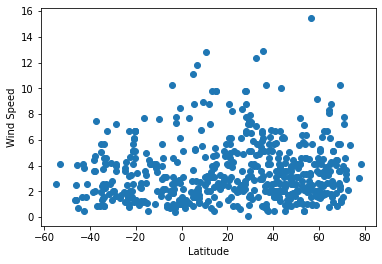

In [130]:
plt.scatter(weather_data.Lat,weather_data.Wind_Speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Images/LatvsWind_Speed.png", dpi=100)
plt.show()

## Linear Regression

In [79]:
# Create Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]


# Define function for linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.82


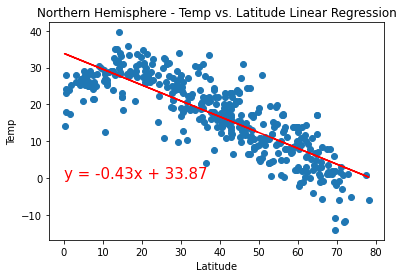

In [131]:
#The R-squared value of .82 indicates a strong correlation, not very strong, between latitude and temperature for tempereatures in the northern hemisphere.

# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temp")

plt.savefig("Images/NorthernHem Temp vs Lat.png", dpi=100)
plt.show()

 Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.79


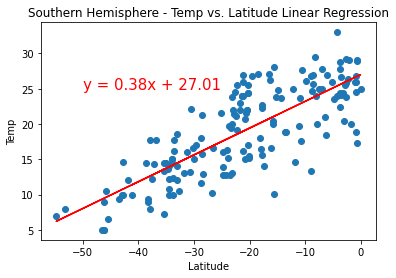

In [132]:
#The R-squared value of .79 indicates a strong correlation, not very strong, between latitude and temperature for tempereatures in the southern hemisphere.

# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Temp"])

# Call an function #2
annotate(equation, -50, 25)

# Set a title
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temp")

plt.savefig("Images/SouthernHem Temp vs Lat.png", dpi=100)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.13


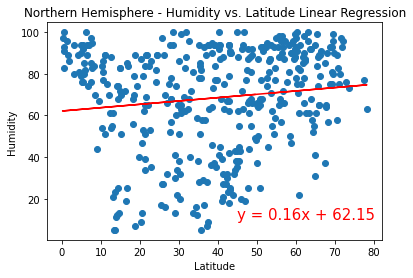

In [133]:
#The R-squared value of .13 indicates a very weak correlation between latitude and temperature for tempereatures in the northern hemisphere.

# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 45, 10)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

plt.savefig("Images/NorthernHem Humidity vs Lat.png", dpi=100)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05


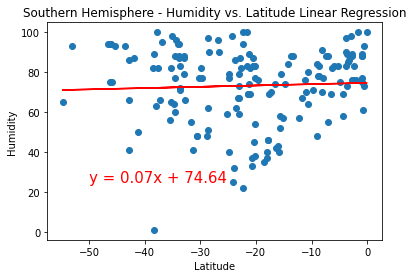

In [134]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -50, 25)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

plt.savefig("Images/SouthernHem Humidity vs Lat.png", dpi=100)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.1


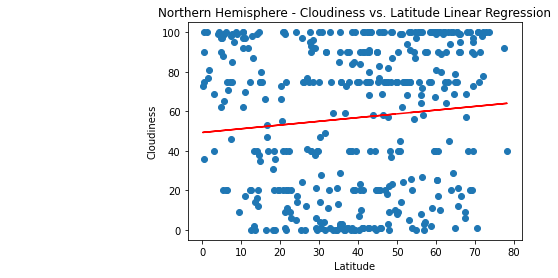

In [135]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -50, 25)

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

plt.savefig("Images/NorthernHem Cloudiness vs Lat.png", dpi=100)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.08


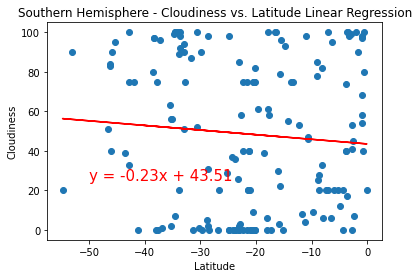

In [136]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -50, 25)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

plt.savefig("Images/SouthernHem Cloudiness vs Lat.png", dpi=100)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.06


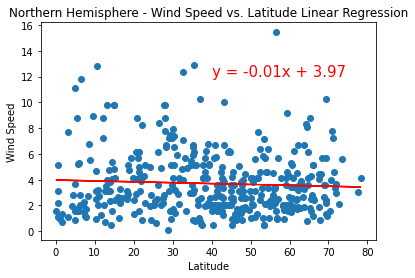

In [137]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind_Speed"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

plt.savefig("Images/NorthernHem Wind Speed vs Lat.png", dpi=100)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


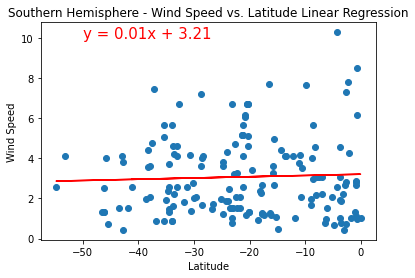

In [138]:

# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind_Speed"])

# Call an function #2
annotate(equation, -50, 10)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

plt.savefig("Images/SouthernHem Wind Speed vs Lat.png", dpi=100)
plt.show()